# Project Title-Loan Prediction
# Member 1 Name-N.Srividhya
# Roll Number-185002103
# Member 2 Name-V.Laasya
# Roll Number-185002125

# Problem Definition

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Loan_Prediction Data

This dataset was obtained from Kaggle and is named Loan Prediction Dataset. 

It contains a set of 613 records under 13 attributes:

1.Loan_ID: A uniques loan ID

2.Gender: Male/Female

3.Married: Married(Yes)/Not married(No)

4.Dependents: Number of persons depending on the client.

5.Education: Application Education (Graduate / Undergraduate)

6.Self_Employed: Self employed (Yes/No)

7.ApplicantIncome: Applicant income

8.CoapplicantIncome: Coapplicant Income

9.LoanAmount: Loan amount in thousands

10.Loan_Amount_Term: Term of lean in months


11.Credit_History: Credit history meets guidelines

12.Property_Area: Urban/Semi and Rural

13.Loan_Status: Loan approved (Y,N)

# Importing Necessary Libraries

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
%matplotlib inline

# Loading the Data

In [359]:
data_train=pd.read_csv("train.csv")

In [360]:
data_test=pd.read_csv("test.csv")

In [361]:
data_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [362]:
data_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [363]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [364]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [365]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [366]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Checking for NULL Values

In [367]:
data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [368]:
data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

The dataset has lot of NULL values in many columns in both train and test data.

# Cleaning the dataset and Preprocessing

In [369]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

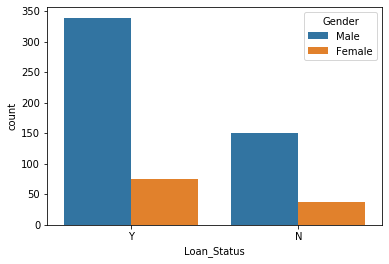

In [370]:
sns.countplot(x='Loan_Status',hue='Gender',data=data_train)

Since The count of Men who paid the loan is high we will fill the missing values with Male.

In [371]:
data_train.Gender = data_train.Gender.fillna('Male')
data_test.Gender=data_test.Gender.fillna('Male')

In [372]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [373]:
sex = pd.get_dummies(data_train['Gender'] , drop_first = True )
data_train.drop(['Gender'], axis = 1 , inplace =True)
data_train = pd.concat([data_train , sex ] , axis = 1)



In [374]:
sex = pd.get_dummies(data_test['Gender'] , drop_first = True )
data_test.drop(['Gender'], axis = 1 , inplace =True)
data_test = pd.concat([data_test , sex ] , axis = 1)



In [375]:
data_train.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [376]:
data_test.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male
0,LP001015,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [377]:
data_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [378]:
data_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

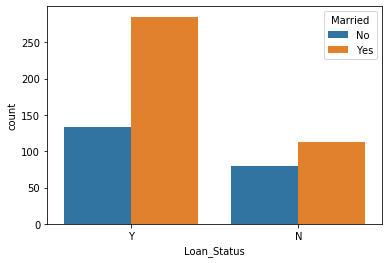

In [379]:
sns.countplot(x='Loan_Status',hue='Married',data=data_train)

In [380]:
data_train.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


Taking The mode Married persons are in majority . So we will fill the missing values with yes.

In [381]:
data_train.Married = data_train.Married.fillna('Yes')
data_test.Married=data_test.Married.fillna('Yes')

In [382]:
married = pd.get_dummies(data_train['Married'] , drop_first = True )
data_train.drop(['Married'], axis = 1 , inplace =True)
data_train = pd.concat([data_train , married ] , axis = 1)

married = pd.get_dummies(data_test['Married'] , drop_first = True )
data_test.drop(['Married'], axis = 1 , inplace =True)
data_test = pd.concat([data_test , married ] , axis = 1)

In [383]:
data_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0


In [384]:
data_train.rename(columns={'Yes': 'Married'}, inplace=True)
data_test.rename(columns={'Yes': 'Married'}, inplace=True)

In [385]:
data_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Married
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0


In [386]:
data_test.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male,Married
0,LP001015,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1
1,LP001022,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1
2,LP001031,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1
3,LP001035,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1,1
4,LP001051,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0


In [387]:
data_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

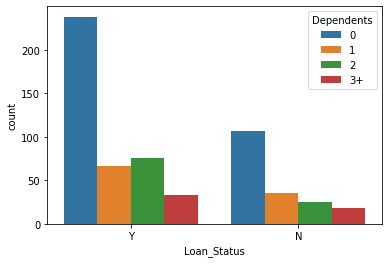

In [388]:
sns.countplot(x='Loan_Status',hue='Dependents',data=data_train)

The applicants with 0 dependants are highest in number so we will fill missing values with 0.

In [389]:
data_train.Dependents = data_train.Dependents.fillna("0")
data_test.Dependents = data_test.Dependents.fillna("0")

In [390]:
type(data_train['Dependents'])

pandas.core.series.Series

Since the number of dependents is of object type we will convert it to interger datatype.(Ex:3+ to 3)

In [391]:
temp = {'0':'0', '1':'1', '2':'2', '3+':'3'}

data_train.Dependents = data_train.Dependents.replace(temp).astype(int)
data_test.Dependents = data_test.Dependents.replace(temp).astype(int)

In [392]:
data_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [393]:
data_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

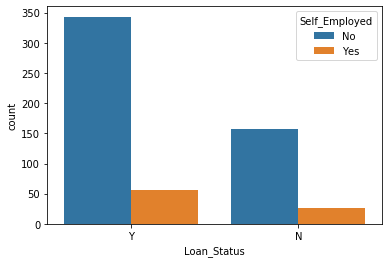

In [394]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=data_train)

The maximum number of applicants are not self employed. So filling the missing values with No.

In [395]:
data_train.Self_Employed = data_train.Self_Employed.fillna('No')
data_test.Self_Employed = data_test.Self_Employed.fillna('No')

In [396]:
Self_Employed = pd.get_dummies(data_train['Self_Employed'] , drop_first = True )
data_train.drop(['Self_Employed'], axis = 1 , inplace =True)
data_train = pd.concat([data_train , Self_Employed ] , axis =1)

Self_Employed = pd.get_dummies(data_test['Self_Employed'] , drop_first = True )
data_test.drop(['Self_Employed'], axis = 1 , inplace =True)
data_test= pd.concat([data_test , Self_Employed ] , axis =1)

                 
                        



In [397]:
data_train.rename(columns={'Yes': 'Self_Employed'}, inplace=True)
data_test.rename(columns={'Yes': 'Self_Employed'}, inplace=True)

In [398]:
data_train.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Married,Self_Employed
0,LP001002,0,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,LP001003,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,LP001005,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1
3,LP001006,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0
4,LP001008,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [399]:
data_train.LoanAmount = data_train.LoanAmount.fillna(data_train.LoanAmount.mean()).astype(int)
data_test.LoanAmount = data_test.LoanAmount.fillna(data_test.LoanAmount.mean()).astype(int)

In [400]:
data_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan Amount term highest count is 360 so filling the empty values with 360

In [401]:
data_train.Loan_Amount_Term = data_train.Loan_Amount_Term.fillna('360.0')
data_test.Loan_Amount_Term = data_test.Loan_Amount_Term.fillna('360.0')

In [402]:
data_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

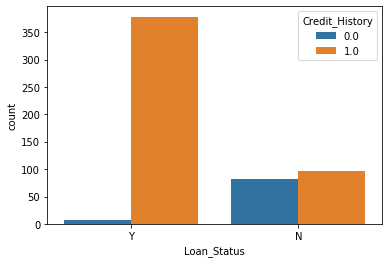

In [403]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=data_train)

In [404]:
data_train.Credit_History = data_train.Credit_History.fillna('1.0')
data_test.Credit_History = data_test.Credit_History.fillna('1.0')

# Cleaned Data

In [405]:
data_train.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Married,Self_Employed
0,LP001002,0,Graduate,5849,0.0,146,360,1,Urban,Y,1,0,0
1,LP001003,1,Graduate,4583,1508.0,128,360,1,Rural,N,1,1,0
2,LP001005,0,Graduate,3000,0.0,66,360,1,Urban,Y,1,1,1
3,LP001006,0,Not Graduate,2583,2358.0,120,360,1,Urban,Y,1,1,0
4,LP001008,0,Graduate,6000,0.0,141,360,1,Urban,Y,1,0,0


In [406]:
data_test.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male,Married,Self_Employed
0,LP001015,0,Graduate,5720,0,110,360,1,Urban,1,1,0
1,LP001022,1,Graduate,3076,1500,126,360,1,Urban,1,1,0
2,LP001031,2,Graduate,5000,1800,208,360,1,Urban,1,1,0
3,LP001035,2,Graduate,2340,2546,100,360,1.0,Urban,1,1,0
4,LP001051,0,Not Graduate,3276,0,78,360,1,Urban,1,0,0


In [407]:
data_train.isna().sum()

Loan_ID              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Male                 0
Married              0
Self_Employed        0
dtype: int64

# Exploratory Data Analysis and Feature Extraction

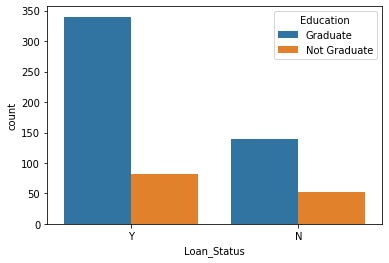

In [408]:
sns.countplot(x='Loan_Status',hue='Education',data=data_train)

<b>The number of applicants who are educated and whose loan status has been approved is  higher as compared to uneducated people</b>

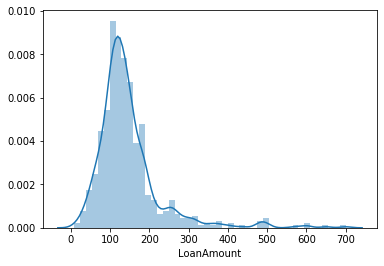

In [409]:
sns.distplot(data_train['LoanAmount'])

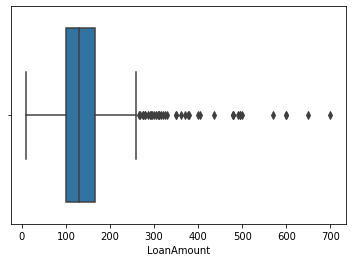

In [410]:
sns.boxplot(x=data_train['LoanAmount'])

<b>There is no outlier present in the dataset</b>

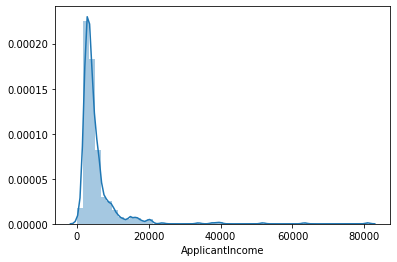

In [411]:
sns.distplot(data_train['ApplicantIncome'])

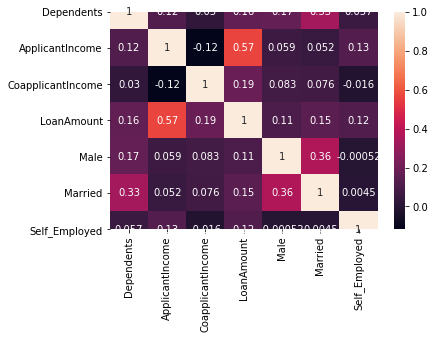

In [412]:
sns.heatmap(data_train.drop('Loan_Status',axis=1).corr(),annot=True)

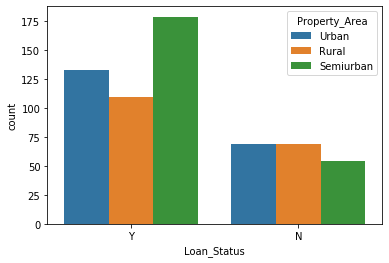

In [413]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=data_train)

# Feature Extraction

<b>We can observer that Loan_ID and Property_Area are not giving much details for predicting the loan status. So we can drop Loan_ID,Property_Area columns</b>

In [414]:
data_train.drop(['Loan_ID'], axis = 1,inplace=True)
data_train.drop(['Property_Area'], axis = 1,inplace=True)


In [415]:
data_test.drop(['Loan_ID'], axis = 1,inplace=True)
data_test.drop(['Property_Area'], axis = 1,inplace=True)

In [416]:
data_train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married,Self_Employed
0,0,Graduate,5849,0.0,146,360,1,Y,1,0,0
1,1,Graduate,4583,1508.0,128,360,1,N,1,1,0
2,0,Graduate,3000,0.0,66,360,1,Y,1,1,1
3,0,Not Graduate,2583,2358.0,120,360,1,Y,1,1,0
4,0,Graduate,6000,0.0,141,360,1,Y,1,0,0


In [417]:
Graduate = pd.get_dummies(data_train['Education'] , drop_first = True )
data_train.drop(['Education'], axis = 1 , inplace =True)
data_train = pd.concat([data_train , Graduate ] , axis =1)

Graduate = pd.get_dummies(data_test['Education'] , drop_first = True )
data_test.drop(['Education'], axis = 1 , inplace =True)
data_test = pd.concat([data_test , Graduate ] , axis =1)


In [418]:
data_train['Loan_Status'] = data_train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

In [419]:
data_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married,Self_Employed,Not Graduate
0,0,5849,0.0,146,360,1,1,1,0,0,0
1,1,4583,1508.0,128,360,1,0,1,1,0,0
2,0,3000,0.0,66,360,1,1,1,1,1,0
3,0,2583,2358.0,120,360,1,1,1,1,0,1
4,0,6000,0.0,141,360,1,1,1,0,0,0


# Model Training

In [420]:
X = data_train.drop('Loan_Status' , axis = 1 )
y = data_train['Loan_Status']

In [421]:
x_test=data_test

In [422]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =103)

# Logistic Regression

In [423]:
from sklearn.linear_model import LogisticRegression
Log_classifier= LogisticRegression(random_state = 0)
Log_classifier.fit(X_train, y_train)

C:\Users\Sujatha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [424]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [425]:
from sklearn.linear_model import LogisticRegression
Log_classifier= LogisticRegression(random_state = 125)
Log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [426]:
y_pred = Log_classifier.predict(X_test)

In [427]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7837837837837838


In [428]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)

In [429]:
conf

array([[ 31,  37],
       [  3, 114]], dtype=int64)

# Random Forest

In [430]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 103)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=103,
                       verbose=0, warm_start=False)

In [431]:
y_pred = rf.predict(X_test)

In [432]:
from sklearn import metrics
print('The accuracy of Random Forest is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest is:  0.7621621621621621


In [433]:
conf = confusion_matrix(y_test, y_pred)

In [434]:
conf

array([[ 31,  37],
       [  7, 110]], dtype=int64)

# SVM

In [435]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state =103)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=103, shrinking=True, tol=0.001,
    verbose=False)

In [436]:
y_pred = svc.predict(X_test)

In [437]:
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.7891891891891892


In [438]:
conf = confusion_matrix(y_test, y_pred)

In [439]:
conf

array([[ 29,  39],
       [  0, 117]], dtype=int64)

# K Nearest Neighbours 

In [440]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [441]:
y_pred = knn.predict(X_test)


In [442]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.7675675675675676


In [443]:
print(confusion_matrix(y_test, y_pred))


[[ 28  40]
 [  3 114]]


In [444]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

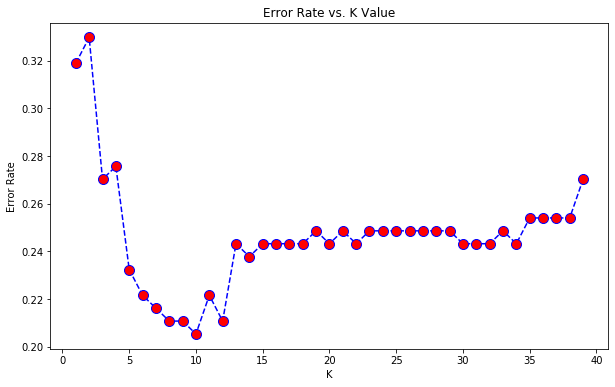

In [445]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [446]:
knn= KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [447]:
y_pred = knn.predict(X_test)

In [448]:
print('The accuracy of KNN  with K=10 is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN  with K=10 is:  0.7945945945945946


In [449]:
print(confusion_matrix(y_test, y_pred))

[[ 30  38]
 [  0 117]]


# Ensemble Voting Classifier 

In [450]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('lr',Log_classifier), ('rf', rf),('knn',knn),('svm',svc)], voting='hard')

In [451]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=125,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                              

In [452]:
y_pred = ensemble.predict(X_test)

In [453]:
print('The accuracy of ensemble model ', metrics.accuracy_score(y_pred, y_test))

The accuracy of ensemble model  0.7891891891891892


In [454]:
print(confusion_matrix(y_test, y_pred))

[[ 31  37]
 [  2 115]]


# Ada Boost

In [474]:
from sklearn.ensemble import AdaBoostClassifier


In [475]:
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

In [476]:
ada_model = AdaBoostClassifier(n_estimators=200,base_estimator=svc,learning_rate=0.01, random_state=103)

In [477]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=True,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.01, n_estimators=200, random_state=103)

In [478]:
y_pred = ada_model.predict(X_test)

In [479]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7891891891891892


# Model Comparisons

<b>The accuracy of Logistic Regression is 78.378%</b>

<b>The accuracy of Random Forest is 76.216%</b>

<b>The accuracy of SVM is 78.918%</b>

<b>The accuracy of KNN with K=10 is 79.459%</b>

<b>The accuracy of ensemble Voting Classifier is 78.918%</b>

<b>The accuracy of Ada Boost is 78.918%</b>

<b>KNN gives the highest accuracy out of all other classification models.So, KNN is the best algorithm for our dataset.</b>

# Hyper Parameter Tuning

In [320]:
from sklearn.model_selection import GridSearchCV

In [343]:
parameters = [{
'n_neighbors':[3,4,5,6,7,8,10,11,12,13,14,15],
'weights':['uniform','distance'],
'metric':['euclidean','manhattan']
}]

In [344]:
gs=GridSearchCV(KNeighborsClassifier(),parameters,cv=5,scoring='accuracy')

In [345]:
gs_results=gs.fit(X_train,y_train)

In [346]:
y_pred=gs.predict(X_test)

In [347]:
print('The accuracy of Hyper Parameter Tuning  is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Hyper Parameter Tuning  is:  0.7945945945945946


In [348]:
gs_results.best_score_

0.8204377564979481

In [349]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [350]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

# Predictions on Unseen Test data from test.csv

In [329]:
x_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married,Self_Employed,Not Graduate
0,0,5720,0,110,360,1,1,1,0,0
1,1,3076,1500,126,360,1,1,1,0,0
2,2,5000,1800,208,360,1,1,1,0,0
3,2,2340,2546,100,360,1.0,1,1,0,0
4,0,3276,0,78,360,1,1,0,0,1


In [352]:
knn= KNeighborsClassifier(n_neighbors = 10,metric="euclidean",weights="uniform")
knn.fit(X_train, y_train)
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

# Reasons for Choosing KNN

->Firstly our problem comes under binary classification and it is a dataset with 613 records under 13 attributes.

->Our dataset is a labelled dataset so we need to use supervised learning algorithm for classification.

-><b>KNN classifies datapoints based on similarity. For Loan_Prediction dataset based on various predictors such as Credit History,Loan Amount,Applicant Income,CoApplicant Income are the key predictors for deciding the loan staus as we have obtained the maximum correlation of these predictors with the Loan Staus. So based on the simalarity for a datapoint with the other datapoints KNN will classify the datapoints.</b>

-><b>Size of training set:</b>Since the number of observations/records are higher as compared to the number of features or attributes KNN algorithm works well as it has a low bias and high variance.

-><b>Classification/Regression:</b>Since our problem is a binary classification problem we have used Random forest,Logistic Regression,KNN,Support Vector Machines etc . After evaluating all algorithms KNN has provided with the highest accuracy.

-><b>Interoperetability of Output:</b>Flexible models are better if higher accuracy is the goal. Since our main aim is to obtain algorithm with best accuracy for our problem the flexible model such as KNN predicts well with a high accuracy rate.

-><b>Accuracy:</b>After Evaluating all models KNN has provided with highest accuarcy of 79.459%. So therefore,it is the best algorithm for our dataset

***

-><b><u>Selecting the hyper parameters</u></b>

1.For selecting the optimal K value<b>we have iterated over various K values and have plotted it against the Error rate</b>.On Observing the graph We find that the minimum error rate is obtained for K=10. So <b><u>K=10</u></b> is the optimal parameter for performing the classification

2.<b>Grid Search For Hyper Parameter Tuning:</b>The parameters passed for grid search is 
    <ol> <li><b> n_neighbours:</b>From the K VS Error rate graph we have selected the K value list for which the error rate is minimal.</li>
    <li><b>Weights:</b> Uniform weights allows all points in each neighbourhood to be weighted equally. Distance weighs points by the inverse of their distance.Closer neighbors of a query datapoint will have a greater influence than neighbors which are further away.</li>
    <li><b>Metric:</b> The distance metric used such as euclidian , manhattan etc.</li>
    </ol>
    
    
-><b>On Finding the results of grid search the optimal hyper paramters were found as <ol><li>n_neighbours:10</li>
    <li>Weights:Uniform</li><li>Metric:euclidean</li></ol>

3.<b>After training our model with the optimal hyper parameters we have obtained a maximum accuracy of 79.459% using KNN 

# Conclusion

<ol><li>The main features such as Application Income,Coapplication Income,Credit_History, Loan Amount , Graduate or not, Dependants are the import features which determines whether to loan status should be approved or not.</li>

<ol start="2"><li>KNN gives the highest accuracy with 79.459% so KNN is the best model which can be used for Loan Prediction dataset.</li>

<b>Therefore, We have successfully made developed a model for Loan_Prediction dataset as well as the predicted the Loan_Status using unseen data with an accuracy of 79.459% using KNN.</b>